In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import dabl
import sweetviz
import pandas_profiling as pp
import matplotlib.pyplot as plt
import plotly.express as py
import pickle as pkl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

C:\Users\SURIYA\AppData\Local\Temp\ipykernel_19652\756682802.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
df=pd.read_csv("petrol-price-dataset-lr.csv",encoding='unicode_escape')

In [3]:
df.head()

,Year,U.S. Field Production of Crude Oil (Thousand Barrels),Crude oil cost per litre,AVERAGE PETROL PRICE
0,1987,254,15.408333,$19.20
1,1988,248,12.567500,$15.97
2,1989,232,15.865000,$19.64
3,1990,224,19.977500,$24.53
4,1991,226,16.531667,$21.54


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Year                                                   36 non-null     object 
 1   U.S. Field Production of Crude Oil (Thousand Barrels)  36 non-null     int64  
 2   Crude oil cost per litre                               36 non-null     float64
 3   AVERAGE PETROL PRICE                                   36 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ KB


In [5]:
df.describe(include="int64")

,U.S. Field Production of Crude Oil (Thousand Barrels)
count,36.000000
mean,223.833333
std,64.094350
min,152.000000
25%,174.500000
50%,201.500000
75%,257.250000
max,375.000000


In [6]:
df.describe(include="float64")

,Crude oil cost per litre
count,36.000000
mean,43.233704
std,29.268795
min,10.841667
25%,16.399167
50%,36.612917
75%,62.554792
max,95.995833


In [7]:
df["AVERAGE PETROL PRICE"]=df["AVERAGE PETROL PRICE"].replace('[$]','',regex=True)

In [8]:
df["AVERAGE PETROL PRICE"]=pd.to_numeric(df["AVERAGE PETROL PRICE"])

In [9]:
df.head()

,Year,U.S. Field Production of Crude Oil (Thousand Barrels),Crude oil cost per litre,AVERAGE PETROL PRICE
0,1987,254,15.408333,19.20
1,1988,248,12.567500,15.97
2,1989,232,15.865000,19.64
3,1990,224,19.977500,24.53
4,1991,226,16.531667,21.54


In [10]:
df.isnull().sum()

Year                                                     0
U.S. Field Production of Crude Oil (Thousand Barrels)    0
Crude oil cost per litre                                 0
AVERAGE PETROL PRICE                                     0
dtype: int64

In [11]:
df["Crude oil cost per litre"]=round(df["Crude oil cost per litre"],2)

In [12]:
df.head()

,Year,U.S. Field Production of Crude Oil (Thousand Barrels),Crude oil cost per litre,AVERAGE PETROL PRICE
0,1987,254,15.41,19.20
1,1988,248,12.57,15.97
2,1989,232,15.86,19.64
3,1990,224,19.98,24.53
4,1991,226,16.53,21.54


In [13]:
corr=df.drop(["Year"],axis=1).corr()

In [14]:
corr

,U.S. Field Production of Crude Oil (Thousand Barrels),Crude oil cost per litre,AVERAGE PETROL PRICE
U.S. Field Production of Crude Oil (Thousand Barrels),1.000000,0.141241,0.121908
Crude oil cost per litre,0.141241,1.000000,0.998519
AVERAGE PETROL PRICE,0.121908,0.998519,1.000000


In [15]:
df.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

,U.S. Field Production of Crude Oil (Thousand Barrels),Crude oil cost per litre,AVERAGE PETROL PRICE
count,36.000000,36.000000,36.000000
mean,223.833333,43.233611,46.964444
std,64.094350,29.269287,28.806407
min,152.000000,10.840000,14.420000
25%,174.500000,16.397500,20.602500
50%,201.500000,36.615000,40.595000
75%,257.250000,62.557500,66.580000
85%,286.500000,84.442500,89.747500
90%,337.500000,94.150000,94.290000
100%,375.000000,96.000000,99.670000


C:\Users\SURIYA\AppData\Local\Temp\ipykernel_19652\4089571839.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["AVERAGE PETROL PRICE"])


<Axes: xlabel='AVERAGE PETROL PRICE', ylabel='Density'>

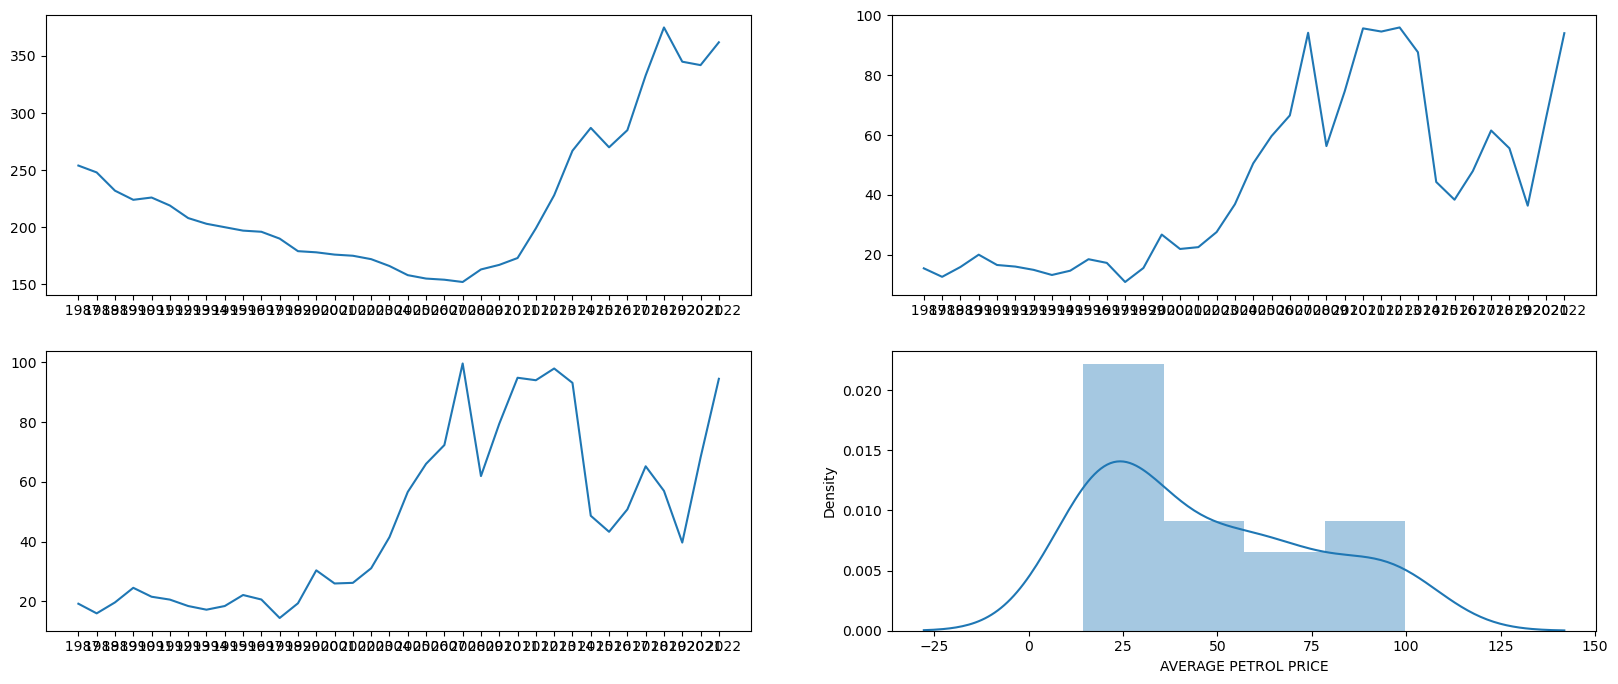

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
plt.plot(df["Year"],df["U.S. Field Production of Crude Oil (Thousand Barrels)"])

plt.subplot(2,2,2)
plt.plot(df["Year"],df["Crude oil cost per litre"])

plt.subplot(2,2,3)
plt.plot(df["Year"],df["AVERAGE PETROL PRICE"])

plt.subplot(2,2,4)
sns.distplot(df["AVERAGE PETROL PRICE"])

<Axes: >

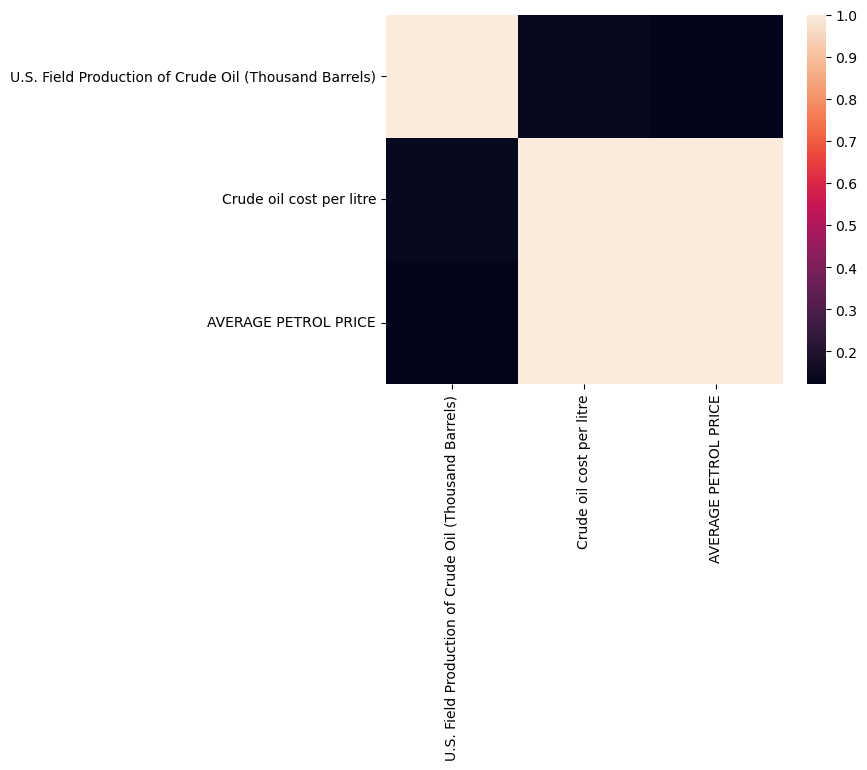

In [17]:
sns.heatmap(corr)

In [18]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
featureconfig=sweetviz.FeatureConfig(force_cat=["AVERAGE PETROL PRICE"])

In [21]:
myreport=sweetviz.compare(df_train,df_test,None,featureconfig)

C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:84: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_compare_names = [cur_name for cur_name, cur_series in compare_df.iteritems()]
C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and wil

In [22]:
myreport.show_html("Petrol_prices.html")

Report Petrol_prices.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [23]:
df=df.drop("Year",axis=1)

In [24]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [25]:
y_train = df_train["AVERAGE PETROL PRICE"]
X_train = df_train.drop('AVERAGE PETROL PRICE',axis=1)

In [26]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
y_test = df_test["AVERAGE PETROL PRICE"]
X_test = df_test.drop('AVERAGE PETROL PRICE',axis=1)

In [28]:
y_pred=lr.predict(X_test)

In [29]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error:',np.mean(errors),'degrees.')
    print('Accuracy = ',accuracy)
    return accuracy
base_accuracy = evaluate(lr, X_test, y_test)

Model Performance
Average Error: 1.1117451378358507 degrees.
Accuracy =  97.47602458013948


In [30]:
pkl.dump(lr,open("model1.pkl","wb"))